### Phase 1 : Exploration et Compréhension de l’Ensemble de Données

In [911]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [912]:
# Charger les données
data = pd.read_csv("train_ML_IOT.csv")

In [913]:
# Aperçu des premières lignes de données
print("Aperçu des données :")
data.head()


Aperçu des données :


,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041


In [914]:
# N'affichiw la taille du jeu de données (combien de lignes w colonnes)
print(data.shape)

(48120, 4)


In [915]:
# Nverifiyiw les types de données te3 koul colonne 
print(data.dtypes)

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object


In [916]:
# Information générale sur les données (type de chaque colonne, valeurs manquantes)
print("\nInformations générales :")
print(data.info())


Informations générales :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [917]:
# Statistiques descriptives des données
print("\nStatistiques descriptives :")
data.describe()


Statistiques descriptives :


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [918]:
# Vérification des valeurs manquantes par colonne
print("\nValeurs manquantes par colonne :")
print(data.isnull().sum())
print("\nNombre de lignes dupliquées:", data.duplicated().sum())


Valeurs manquantes par colonne :
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Nombre de lignes dupliquées: 0


In [919]:
# Naffichiw combien de valeurs uniques kaynin fi chaque colonne
for col in data.columns:
    print(col, data[col].nunique())

DateTime 14592
Junction 4
Vehicles 141
ID 48120


### Distribution des données par carrefour (Junction)

C:\Users\sayli\AppData\Local\Temp\ipykernel_11416\4050741185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Junction', palette='viridis')


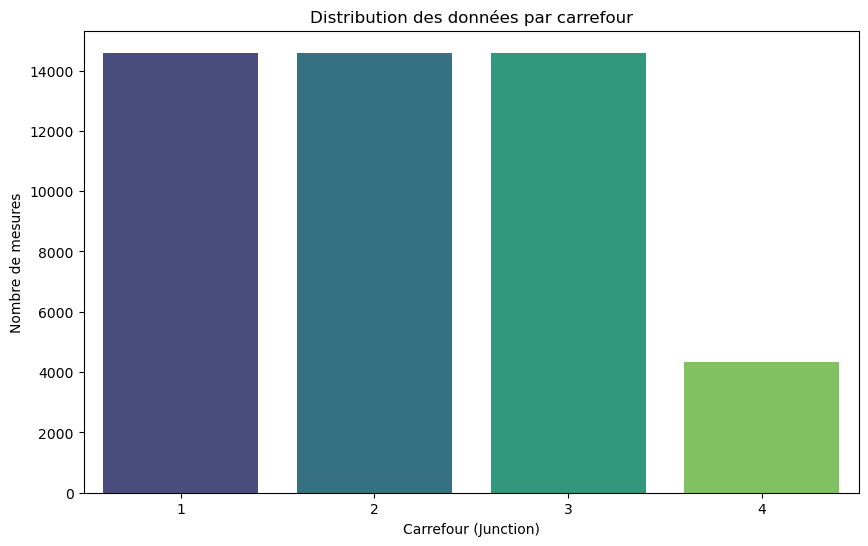

In [920]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Junction', palette='viridis')
plt.title("Distribution des données par carrefour")
plt.xlabel("Carrefour (Junction)")
plt.ylabel("Nombre de mesures")
plt.show()

### 1. Aperçu de la couverture temporelle

Plage temporelle des données : 2015-11-01 00:00:00 à 2017-06-30 23:00:00


C:\Users\sayli\AppData\Local\Temp\ipykernel_11416\1070146053.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  coverage = data.resample('M').size()


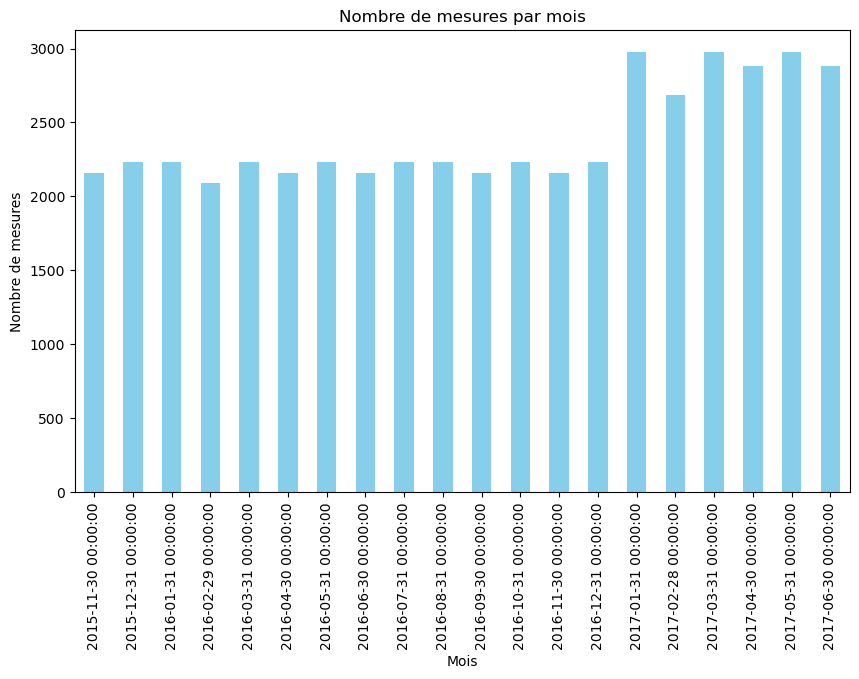

In [921]:
data['DateTime'] = pd.to_datetime(data['DateTime'])  # Convertir en format datetime
data.set_index('DateTime', inplace=True)  # Définir DateTime comme index
print(f"Plage temporelle des données : {data.index.min()} à {data.index.max()}")

# Vérification de la couverture temporelle (par mois)
coverage = data.resample('M').size()
plt.figure(figsize=(10, 6))
coverage.plot(kind='bar', color='skyblue')
plt.title("Nombre de mesures par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de mesures")
plt.show()

### R1.Périodes bien couvertes : janvier, mars ,mai & juin

### 2. Identification des schémas de circulation

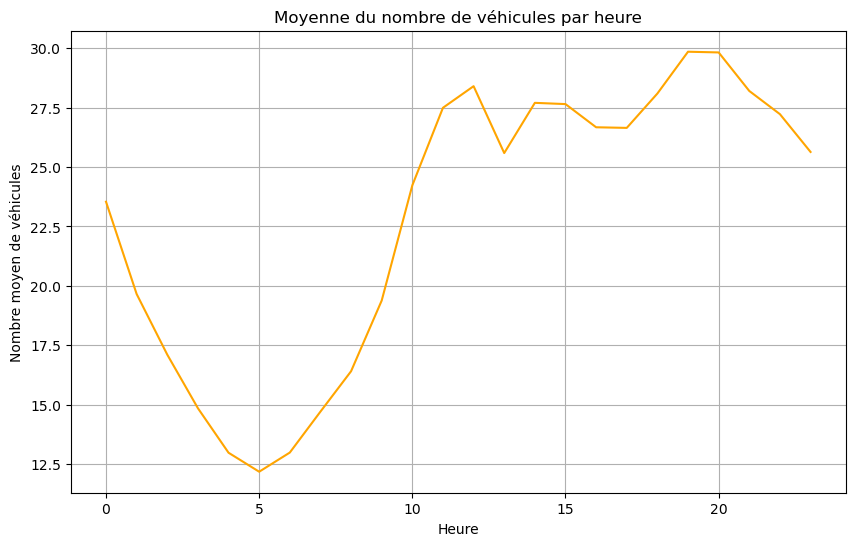

C:\Users\sayli\AppData\Local\Temp\ipykernel_11416\1071735890.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="viridis")


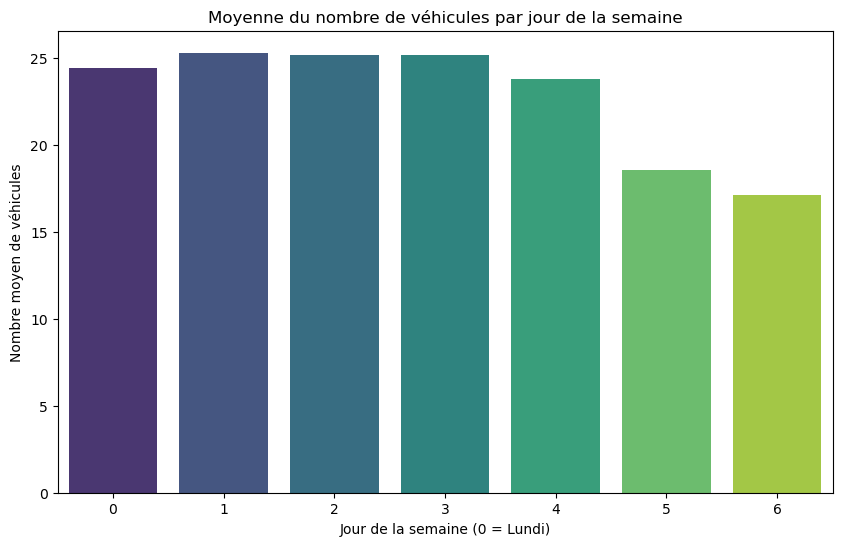

In [922]:

# Moyenne du trafic par heure pour voir les tendances journalières
data['Heure'] = data.index.hour
hourly_traffic = data.groupby('Heure')['Vehicles'].mean()

plt.figure(figsize=(10, 6))
hourly_traffic.plot(color='orange')
plt.title("Moyenne du nombre de véhicules par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre moyen de véhicules")
plt.grid()
plt.show()

# Moyenne du trafic par jour de la semaine pour voir les tendances hebdomadaires
data['Jour_semaine'] = data.index.dayofweek  # 0 = Lundi, 6 = Dimanche
daily_traffic = data.groupby('Jour_semaine')['Vehicles'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_traffic.index, y=daily_traffic.values, palette="viridis")
plt.title("Moyenne du nombre de véhicules par jour de la semaine")
plt.xlabel("Jour de la semaine (0 = Lundi)")
plt.ylabel("Nombre moyen de véhicules")
plt.show()

### R2:...................

### 3. Sources de variation

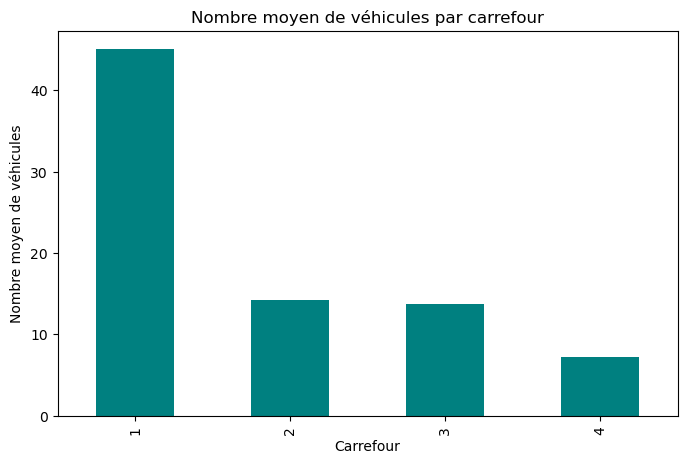

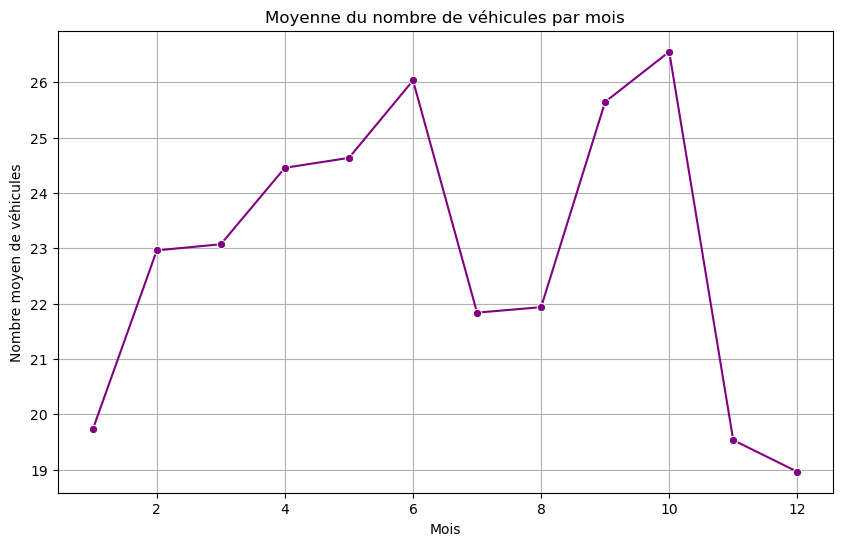

In [923]:
# Variation par carrefour
junction_traffic = data.groupby('Junction')['Vehicles'].mean()

plt.figure(figsize=(8, 5))
junction_traffic.plot(kind='bar', color='teal')
plt.title("Nombre moyen de véhicules par carrefour")
plt.xlabel("Carrefour")
plt.ylabel("Nombre moyen de véhicules")
plt.show()

# Variation saisonnière
data['Mois'] = data.index.month
monthly_traffic = data.groupby('Mois')['Vehicles'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_traffic.index, y=monthly_traffic.values, marker="o", color="purple")
plt.title("Moyenne du nombre de véhicules par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre moyen de véhicules")
plt.grid()
plt.show()


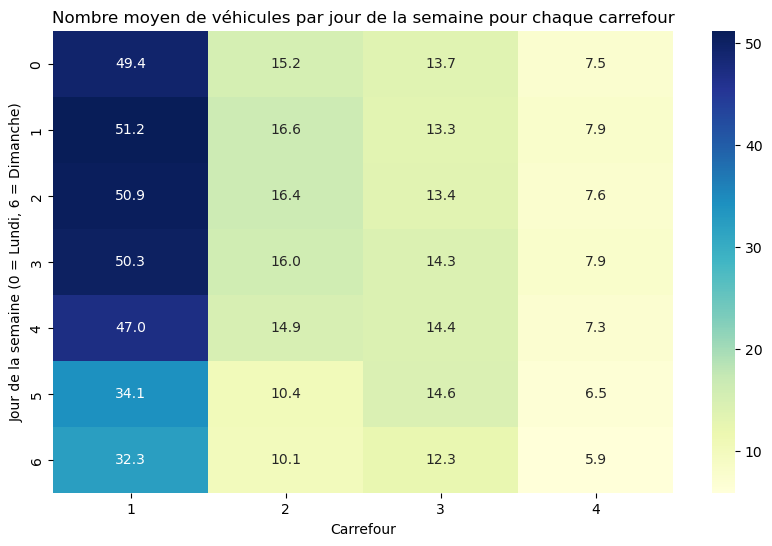

In [924]:
# Résumé des tendances hebdomadaires
data['Jour_semaine'] = data.index.dayofweek
weekly_traffic = data.groupby(['Jour_semaine', 'Junction'])['Vehicles'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(weekly_traffic, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title("Nombre moyen de véhicules par jour de la semaine pour chaque carrefour")
plt.xlabel("Carrefour")
plt.ylabel("Jour de la semaine (0 = Lundi, 6 = Dimanche)")
plt.show()


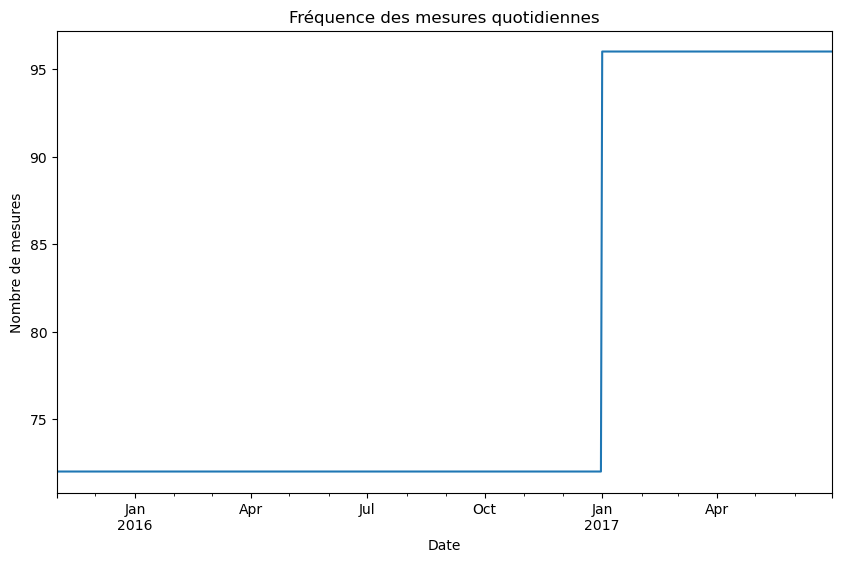

In [925]:

# Analyse de la périodicité des données
# Comptage des mesures par jour pour identifier la fréquence des échantillons
daily_counts = data.resample('D').size()
plt.figure(figsize=(10, 6))
daily_counts.plot()
plt.title("Fréquence des mesures quotidiennes")
plt.xlabel("Date")
plt.ylabel("Nombre de mesures")
plt.show()


### R3.Sources de variation :
#### Variations entre les carrefours, les périodes de la journée, et les jours fériés ou événements spéciaux.


### Phase 2 : Prétraitement des Données

In [926]:
import pandas as pd
import numpy as np

# Charger les données (si ce n'est pas déjà fait)
data = pd.read_csv("train_ML_IOT.csv")

# Convertir DateTime au format datetime et définir comme index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Vérifier les valeurs manquantes
print("Valeurs manquantes avant traitement :")
print(data.isnull().sum())

# 1. Nettoyage des Données
# Remplir les valeurs manquantes en utilisant l'interpolation
data['Vehicles'] = data['Vehicles'].interpolate(method='time')

# Vérifier si toutes les valeurs manquantes sont corrigées
print("\nValeurs manquantes après interpolation :")
print(data.isnull().sum())

# 2. Transformation des Données
# Ajouter des caractéristiques temporelles
data['Jour_semaine'] = data.index.dayofweek  # 0 = Lundi, 6 = Dimanche
data['Heure'] = data.index.hour
data['Mois'] = data.index.month

# Ajouter une colonne pour distinguer les jours ouvrés et les week-ends
data['Type_jour'] = np.where(data['Jour_semaine'] < 5, 'Ouvré', 'Week-end')

def determiner_saison(jour, mois):
    if (mois == 12 and jour >= 21) or (mois in [1, 2]) or (mois == 3 and jour < 21):
        return 'Hiver'
    elif (mois == 3 and jour >= 21) or (mois in [4, 5]) or (mois == 6 and jour < 21):
        return 'Printemps'
    elif (mois == 6 and jour >= 21) or (mois in [7, 8]) or (mois == 9 and jour < 21):
        return 'Été'
    elif (mois == 9 and jour >= 21) or (mois in [10, 11]) or (mois == 12 and jour < 21):
        return 'Automne'

# Appliquer la fonction pour déterminer les saisons
data['Jour'] = data.index.day  # Extraire le jour
data['Saison'] = data.apply(lambda x: determiner_saison(x['Jour'], x['Mois']), axis=1)

# Vérifier les résultats
print("\nAperçu des données avec les saisons précises :")
print(data[['Jour', 'Mois', 'Saison']].head())

# 3. Normalisation et Structuration
# Normaliser les colonnes numériques (Vehicles) pour les séries temporelles
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Vehicles_normalized'] = scaler.fit_transform(data[['Vehicles']])

# Vérifier la normalisation
print("\nAperçu des données après normalisation :")
print(data[['Vehicles', 'Vehicles_normalized']].head())

# Sauvegarder les données prétraitées pour une utilisation ultérieure
data.to_csv("data_pretraitées.csv")


Valeurs manquantes avant traitement :
Junction    0
Vehicles    0
ID          0
dtype: int64

Valeurs manquantes après interpolation :
Junction    0
Vehicles    0
ID          0
dtype: int64

Aperçu des données avec les saisons précises :
                     Jour  Mois   Saison
DateTime                                
2015-11-01 00:00:00     1    11  Automne
2015-11-01 01:00:00     1    11  Automne
2015-11-01 02:00:00     1    11  Automne
2015-11-01 03:00:00     1    11  Automne
2015-11-01 04:00:00     1    11  Automne

Aperçu des données après normalisation :
                     Vehicles  Vehicles_normalized
DateTime                                          
2015-11-01 00:00:00        15             0.078212
2015-11-01 01:00:00        13             0.067039
2015-11-01 02:00:00        10             0.050279
2015-11-01 03:00:00         7             0.033520
2015-11-01 04:00:00         9             0.044693


### Phase 3 : Analyse Exploratoire des Données (AED)

#### 1. Visualisation des tendances
#### Trafic par carrefour

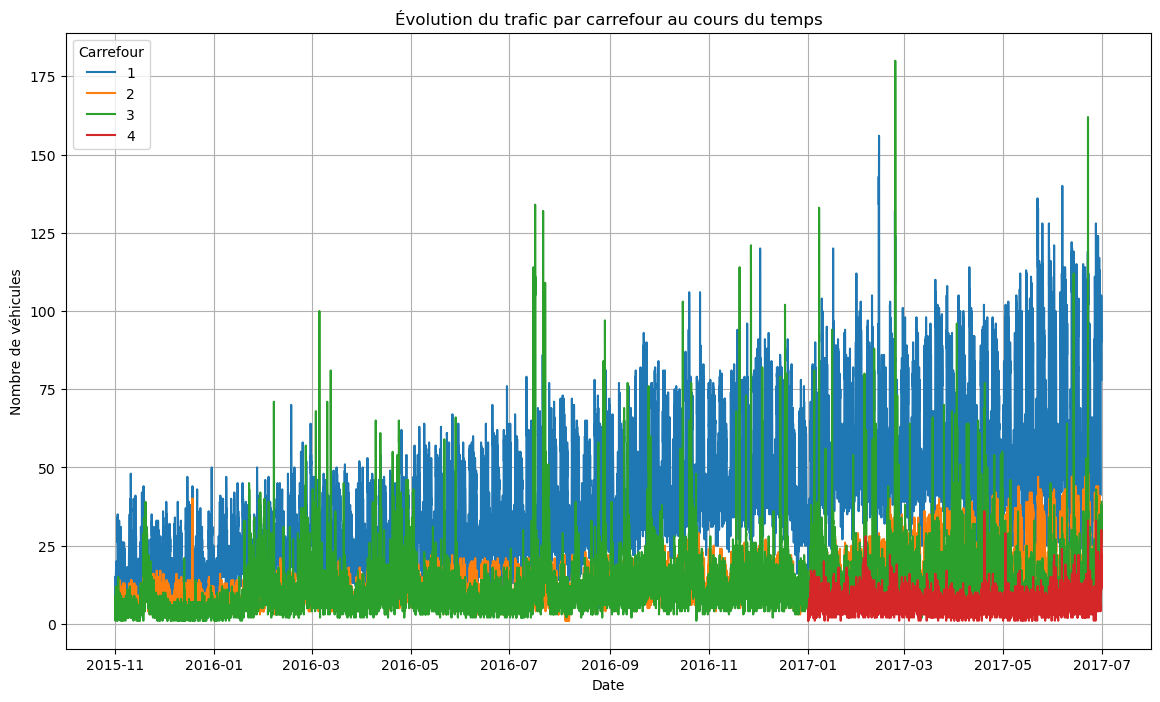

In [927]:
### import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Charger les données prétraitées
data = pd.read_csv("data_pretraitées.csv", parse_dates=['DateTime'])
data.set_index('DateTime', inplace=True)

# 1. Visualisation des tendances
# Trafic par carrefour
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x=data.index, y='Vehicles', hue='Junction', palette='tab10')
plt.title("Évolution du trafic par carrefour au cours du temps")
plt.xlabel("Date")
plt.ylabel("Nombre de véhicules")
plt.legend(title="Carrefour")
plt.grid()
plt.show()

####  Trafic moyen par jour de la semaine

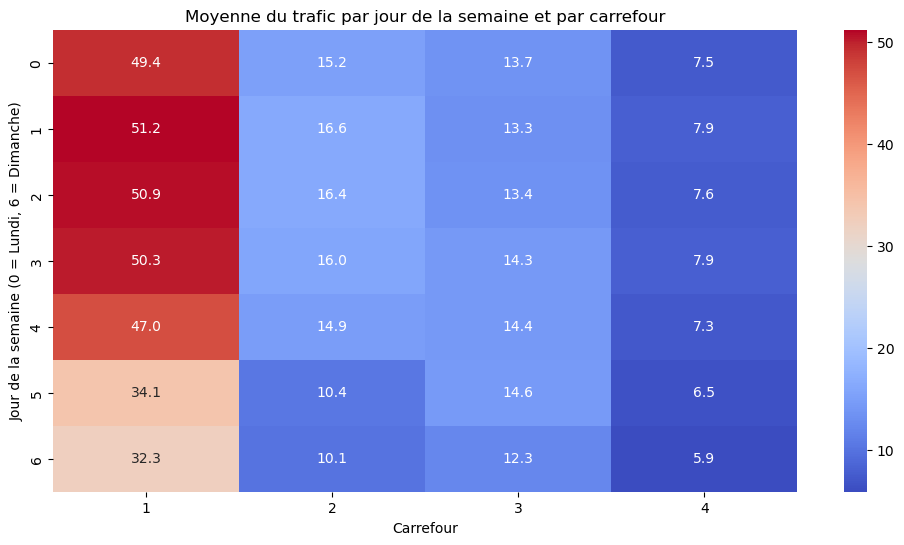

In [928]:
# Trafic moyen par jour de la semaine
daily_traffic = data.groupby(['Jour_semaine', 'Junction'])['Vehicles'].mean().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(daily_traffic, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Moyenne du trafic par jour de la semaine et par carrefour")
plt.xlabel("Carrefour")
plt.ylabel("Jour de la semaine (0 = Lundi, 6 = Dimanche)")
plt.show()


####  Trafic moyen par heure de la journée

<Figure size 1200x600 with 0 Axes>

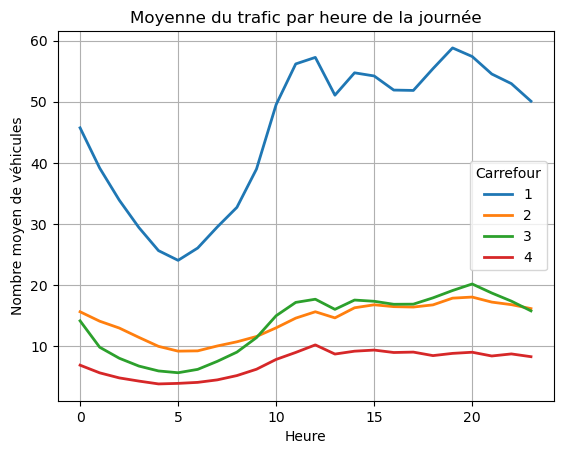

In [929]:
# Trafic moyen par heure de la journée
hourly_traffic = data.groupby(['Heure', 'Junction'])['Vehicles'].mean().unstack()

plt.figure(figsize=(12, 6))
hourly_traffic.plot(kind='line', linewidth=2)
plt.title("Moyenne du trafic par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre moyen de véhicules")
plt.legend(title="Carrefour")
plt.grid()
plt.show()

#### 2. Identification des Périodes Clés
#### Périodes de forte affluence (top 10 jours)

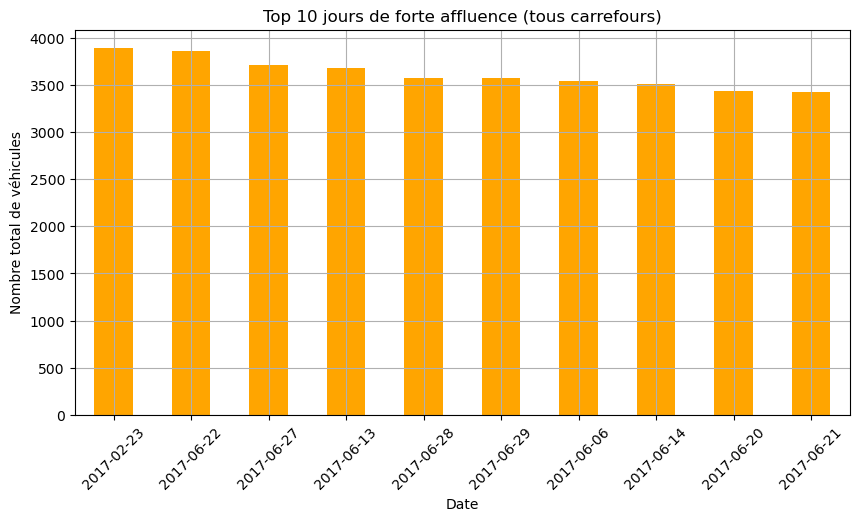

In [930]:

# 2. Identification des Périodes Clés
# Périodes de forte affluence (top 10 jours)
top_days = data.groupby(data.index.date)['Vehicles'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_days.plot(kind='bar', color='orange')
plt.title("Top 10 jours de forte affluence (tous carrefours)")
plt.xlabel("Date")
plt.ylabel("Nombre total de véhicules")
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Comportements spécifiques aux jours fériés

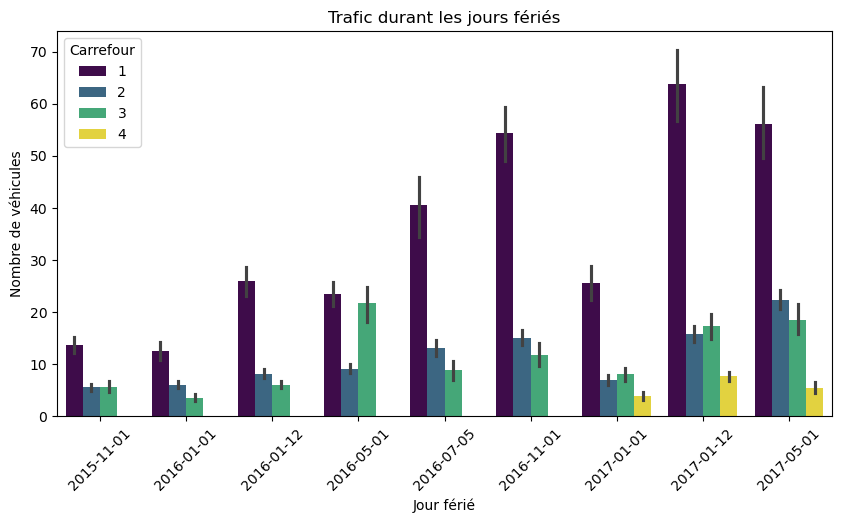

In [931]:
# Comportements spécifiques aux jours fériés
# Liste des jours fériés sous forme "mois-jour"
jours_fériés = ['01-01', '01-12', '05-01', '07-05', '11-01']  # Format mois-jour

# Ajouter une colonne "Mois-Jour" dans les données
data['Mois-Jour'] = data.index.strftime('%m-%d')

# Filtrer les données correspondant aux jours fériés
fériés_traffic = data[data['Mois-Jour'].isin(jours_fériés)]

# Visualisation du trafic durant les jours fériés
if not fériés_traffic.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=fériés_traffic, x=fériés_traffic.index.date, y='Vehicles', hue='Junction', palette='viridis')
    plt.title("Trafic durant les jours fériés")
    plt.xlabel("Jour férié")
    plt.ylabel("Nombre de véhicules")
    plt.xticks(rotation=45)
    plt.legend(title="Carrefour")
    plt.show()
else:
    print("Aucune donnée disponible pour les jours fériés spécifiés.")

#### Corrélation du trafic entre les carrefours

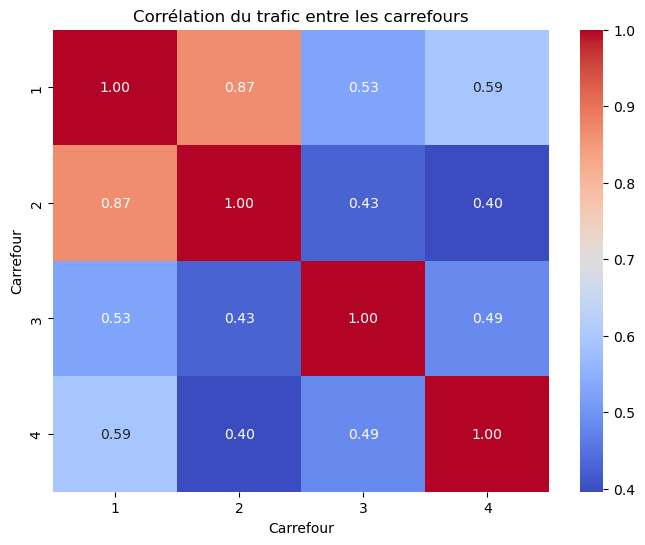

In [932]:
# Corrélation du trafic entre les carrefours
traffic_corr = data.pivot_table(index=data.index, columns='Junction', values='Vehicles').corr()

plt.figure(figsize=(8, 6))
sns.heatmap(traffic_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Corrélation du trafic entre les carrefours")
plt.xlabel("Carrefour")
plt.ylabel("Carrefour")
plt.show()

#### Répartition du trafic par saison

<Figure size 1000x600 with 0 Axes>

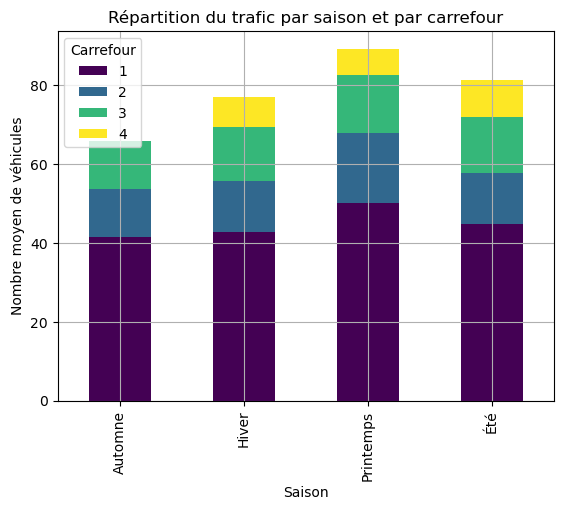

In [933]:
# Répartition du trafic par saison
season_traffic = data.groupby(['Saison', 'Junction'])['Vehicles'].mean().unstack()

plt.figure(figsize=(10, 6))
season_traffic.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Répartition du trafic par saison et par carrefour")
plt.xlabel("Saison")
plt.ylabel("Nombre moyen de véhicules")
plt.legend(title="Carrefour")
plt.grid()
plt.show()




### 4

Taille des données d'entraînement : 486
Taille des données de test : 122
ARIMA - MAE: 410.91, RMSE: 519.49


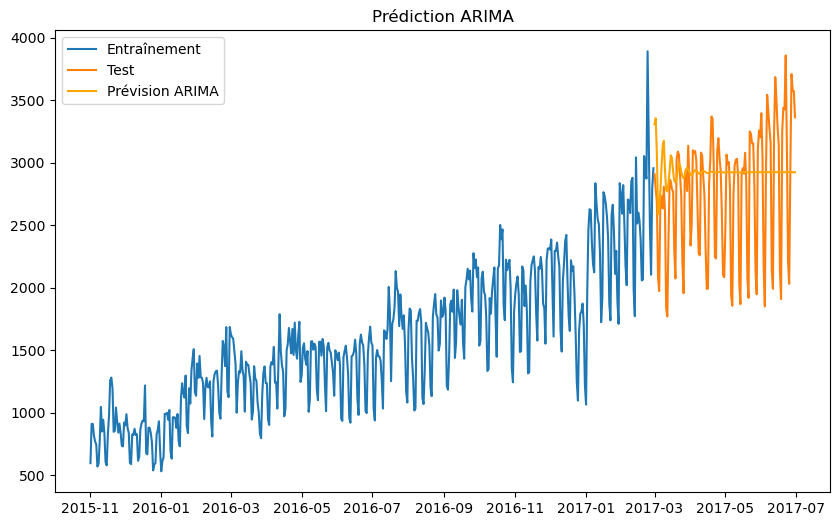

c:\Users\sayli\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1154
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074
Epoch 16/20
15/15 

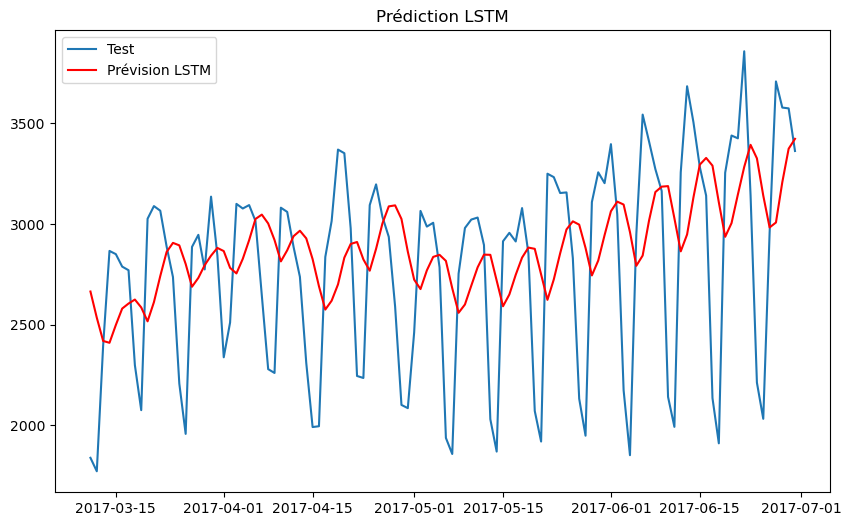

In [954]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Charger les données
data = pd.read_csv("data_pretraitées.csv", parse_dates=['DateTime'])
data.set_index('DateTime', inplace=True)

# Agréger les données par jour pour réduire le bruit
daily_data = data['Vehicles'].resample('D').sum()

# Division des données en train et test
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

print("Taille des données d'entraînement :", len(train))
print("Taille des données de test :", len(test))
# Modélisation avec ARIMA
arima_model = ARIMA(train, order=(5, 1, 0))  # (p=5, d=1, q=0) : ajuster les paramètres si nécessaire
arima_result = arima_model.fit()

# Prédiction
arima_forecast = arima_result.forecast(steps=len(test))

# Évaluation du modèle
mae = mean_absolute_error(test, arima_forecast)
rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(train, label='Entraînement')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='Prévision ARIMA', color='orange')
plt.title("Prédiction ARIMA")
plt.legend()
plt.show()
# Préparation des données pour LSTM
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))

# Création des séquences pour LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Longueur de la fenêtre temporelle
X_train, y_train = create_sequences(train_scaled, seq_length)

# Modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Entraînement
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Prédiction
test_scaled = scaler.transform(test.values.reshape(-1, 1))
X_test, y_test = create_sequences(test_scaled, seq_length)

y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Évaluation
mae = mean_absolute_error(test[seq_length:], y_pred_rescaled)
rmse = np.sqrt(mean_squared_error(test[seq_length:], y_pred_rescaled))
print(f"LSTM - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(test.index[seq_length:], test[seq_length:], label='Test')
plt.plot(test.index[seq_length:], y_pred_rescaled, label='Prévision LSTM', color='red')
plt.title("Prédiction LSTM")
plt.legend()
plt.show()




### Phase 4 : Modélisation et Prédiction

### ARRIMA

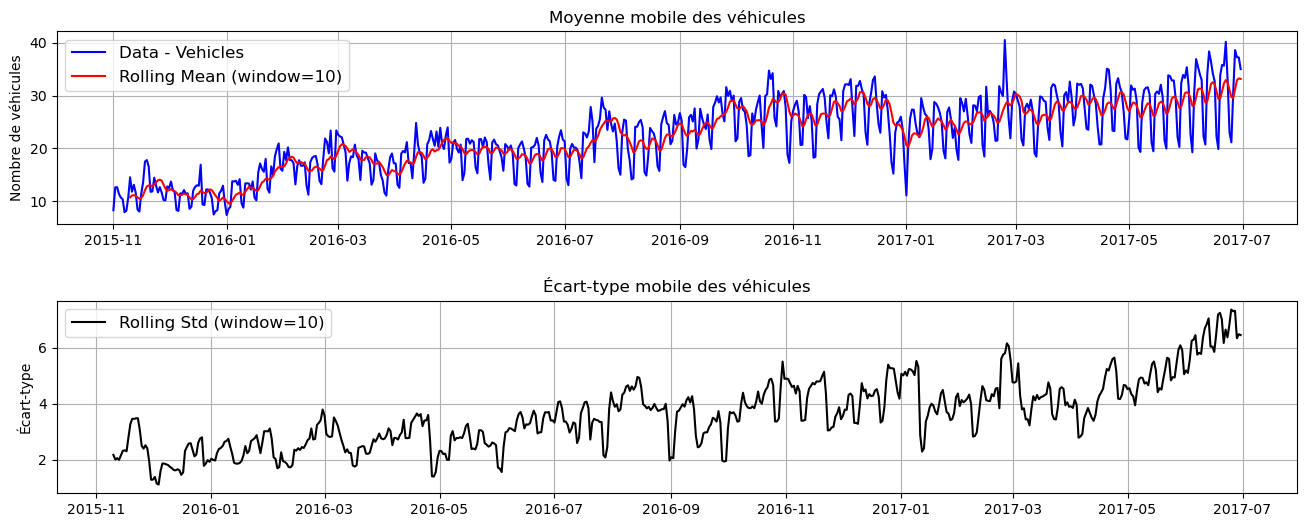

In [935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Chargement des données
data = pd.read_csv("data_pretraitées.csv", parse_dates=['DateTime'], index_col='DateTime')

# 2. Agrégation des données par jour
data_daily = data['Vehicles'].resample('D').mean().dropna()

# 3. Calcul de la moyenne mobile et de l'écart-type
window = 10  # Fenêtre de 10 jours
rolling_mean = data_daily.rolling(window=window).mean()
rolling_std = data_daily.rolling(window=window).std()

# 4. Visualisation de la moyenne mobile et de l'écart-type
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6))
plt.subplots_adjust(hspace=0.4)  # Espacement entre les sous-graphiques

# Graphique de la moyenne mobile
ax1.plot(data_daily, c='blue', label='Data - Vehicles')
ax1.plot(rolling_mean, c='red', label=f'Rolling Mean (window={window})')
ax1.legend(fontsize=12)
ax1.set_ylabel('Nombre de véhicules')
ax1.set_title('Moyenne mobile des véhicules')
ax1.grid()

# Graphique de l'écart-type
ax2.plot(rolling_std, c='black', label=f'Rolling Std (window={window})')
ax2.legend(fontsize=12)
ax2.set_ylabel('Écart-type')
ax2.set_title('Écart-type mobile des véhicules')
ax2.grid()

# Affichage des graphiques
plt.show()


### Test de stationnarité avec Dickey-Fuller

In [936]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# 2. Test de stationnarité Dickey-Fuller
resultDFtest = adfuller(data_daily, autolag='AIC')

# 3. Résultats du test sous forme de série Pandas
Out = pd.Series(resultDFtest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Ajouter les valeurs critiques (1%, 5%, 10%)
for key, value in resultDFtest[4].items():
    Out['Critical Value (%s)' % key] = value

# 4. Affichage des résultats
print('DICK-FULLER RESULTS: \n\n{}'.format(Out))

# 5. Interprétation
if resultDFtest[1] <= 0.05:
    print("\nConclusion : La série est stationnaire (p-value <= 0.05).")
else:
    print("\nConclusion : La série n'est pas stationnaire (p-value > 0.05).")


DICK-FULLER RESULTS: 

Test Statistic                  -1.019845
p-value                          0.745957
#Lags Used                      19.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64

Conclusion : La série n'est pas stationnaire (p-value > 0.05).


### Différenciation et Analyse des Autocorrélations

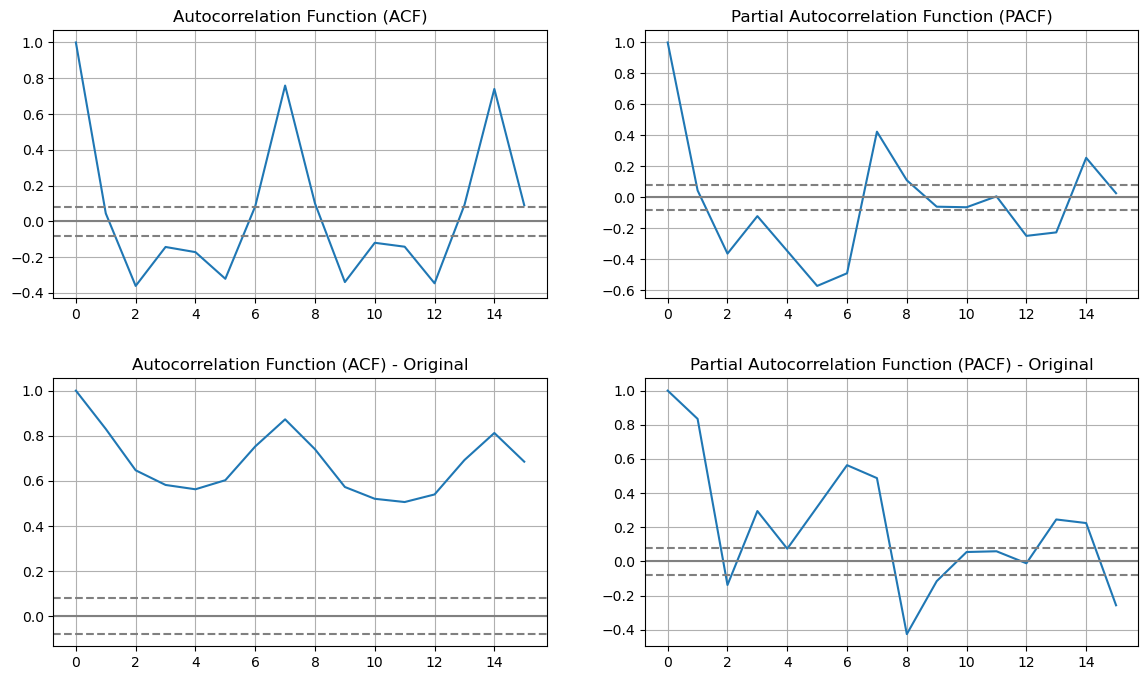

In [937]:
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# 1. Différenciation de la série pour la rendre stationnaire
data_daily_diff = data_daily.diff().dropna()  # Différencier pour rendre stationnaire

# 2. Calcul des autocorrélations (ACF) et des autocorrélations partielles (PACF)
ACF = acf(data_daily_diff, nlags=15)
PACF = pacf(data_daily_diff, nlags=15, method='ols')

# 3. Visualisation des ACF et PACF
def plot_corr(ax, func, title, data):
    ax.plot(func)
    ax.axhline(y=0, linestyle='-', c='gray')
    ax.axhline(y=-1.96/np.sqrt(len(data)), linestyle='--', c='gray')
    ax.axhline(y=1.96/np.sqrt(len(data)), linestyle='--', c='gray')
    ax.grid()
    ax.set_title(title)

# 4. Tracer les autocorrélations et les autocorrélations partielles
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))
plt.subplots_adjust(hspace=0.3)

plot_corr(ax1, ACF, 'Autocorrelation Function (ACF)', data_daily_diff)
plot_corr(ax2, PACF, 'Partial Autocorrelation Function (PACF)', data_daily_diff)

# Tracer ACF et PACF de la série brute (avant différenciation)
ACF_orig = acf(data_daily, nlags=15)
PACF_orig = pacf(data_daily, nlags=15, method='ols')

plot_corr(ax3, ACF_orig, 'Autocorrelation Function (ACF) - Original', data_daily)
plot_corr(ax4, PACF_orig, 'Partial Autocorrelation Function (PACF) - Original', data_daily)

plt.show()


### Training

In [938]:
# 1. Diviser la série temporelle en ensembles d'entraînement (70%) et de test (30%)
size = int(len(data_daily) * 0.7)  # 70% pour l'entraînement
train = data_daily[:size]  # Ensemble d'entraînement
test = data_daily[size:]  # Ensemble de test

# 2. Afficher les tailles des ensembles
print('Number of points in series:', len(data_daily))
print('Number of points in train:', len(train))
print('Number of points in test:', len(test))


Number of points in series: 608
Number of points in train: 425
Number of points in test: 183


Akaike Information Criterion (AIC):  2128.339990544702


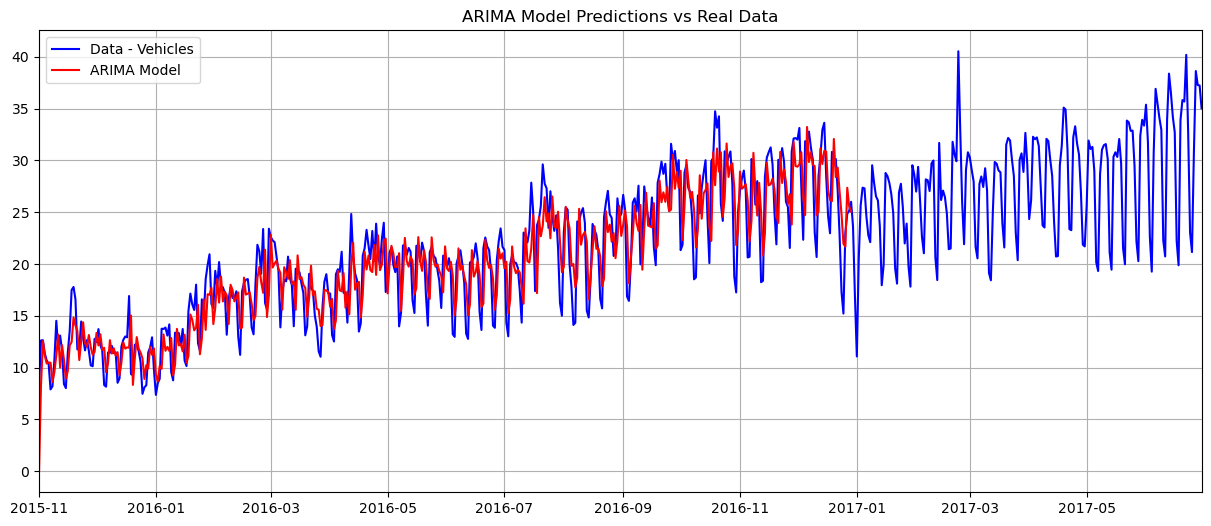

In [939]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 1. Ajuster le modèle ARIMA (p=2, d=1, q=1) avec les données d'entraînement
model = ARIMA(train, order=(2, 1, 1))  # Choix des paramètres (p, d, q)
model_fit = model.fit()

# 2. Afficher l'Akaike Information Criterion (AIC) pour évaluer la qualité du modèle
print('Akaike Information Criterion (AIC): ', model_fit.aic)

# 3. Visualisation des résultats
plt.figure(figsize=(15, 6))

# Tracer les données réelles (série temporelle)
plt.plot(data_daily, c='blue', label='Data - Vehicles')

# Tracer les prédictions du modèle (sans dynamique pour éviter les biais)
plt.plot(model_fit.predict(dynamic=False), c='red', label='ARIMA Model')

# Ajouter les légendes et afficher le graphique
plt.legend()
plt.grid(True)
plt.margins(x=0)
plt.title("ARIMA Model Predictions vs Real Data")
plt.show()


In [940]:
# 1. Afficher le résumé détaillé du modèle ajusté
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  425
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -1060.170
Date:                Wed, 18 Dec 2024   AIC                           2128.340
Time:                        00:18:12   BIC                           2144.539
Sample:                    11-01-2015   HQIC                          2134.740
                         - 12-29-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6178      0.051     12.049      0.000       0.517       0.718
ar.L2         -0.3375      0.064     -5.315      0.000      -0.462      -0.213
ma.L1         -0.8751      0.031    -27.847      0.0

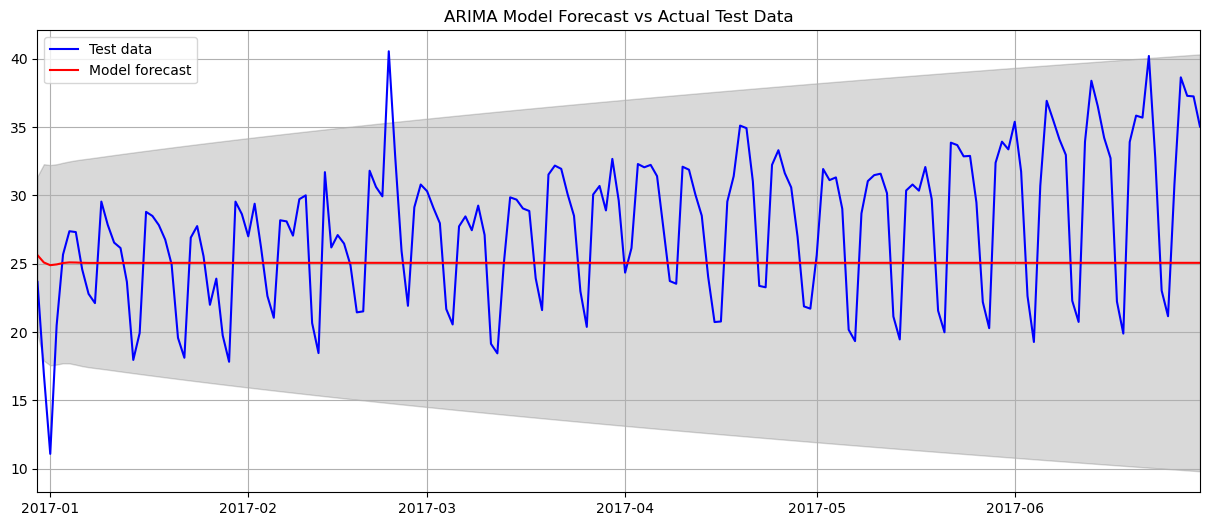

In [941]:
# 1. Ajouter les données de test à l'ajustement du modèle pour affiner les prévisions
new_fit = model_fit.append(data_daily[size:size+1], refit=False)

# 2. Prédire les valeurs sur la période de test
forecast = model_fit.forecast(len(test))

# 3. Obtenir les intervalles de confiance pour les prévisions (à 95%)
confidence = model_fit.get_forecast(len(test)).conf_int(0.05)

# 4. Visualisation des résultats
plt.figure(figsize=(15, 6))

# Tracer les données de test (valeurs réelles)
plt.plot(test, c='blue', label='Test data')

# Tracer les prévisions du modèle ARIMA
plt.plot(forecast, c='red', label='Model forecast')

# Ajouter les intervalles de confiance (bande autour des prévisions)
plt.fill_between(confidence.index, confidence['lower Vehicles'], confidence['upper Vehicles'], color='k', alpha=0.15)

# Ajouter légendes, titres et axes
plt.legend()
plt.grid(True)
plt.margins(x=0)
plt.title("ARIMA Model Forecast vs Actual Test Data")

# Afficher le graphique
plt.show()


In [942]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Calcul des métriques d'évaluation
mse = mean_squared_error(test, forecast)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(test, forecast)  # Mean Absolute Error
mape = np.mean(np.abs(forecast - test) / np.abs(test))  # Mean Absolute Percentage Error

# 2. Calcul du MASE (Mean Absolute Scaled Error)
mase = np.mean(np.abs(test - forecast)) / (np.abs(np.diff(train)).sum() / (len(train) - 1))

# 3. Calcul du R² (coefficient de détermination)
r2 = r2_score(test, forecast)

# 4. Affichage des résultats
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MAPE: {mape:.3f}')
print(f'MASE: {mase:.3f}')
print(f'R² score: {r2:.3f}')


MSE: 35.425
RMSE: 5.952
MAE: 5.095
MAPE: 0.184
MASE: 2.036
R² score: -0.241


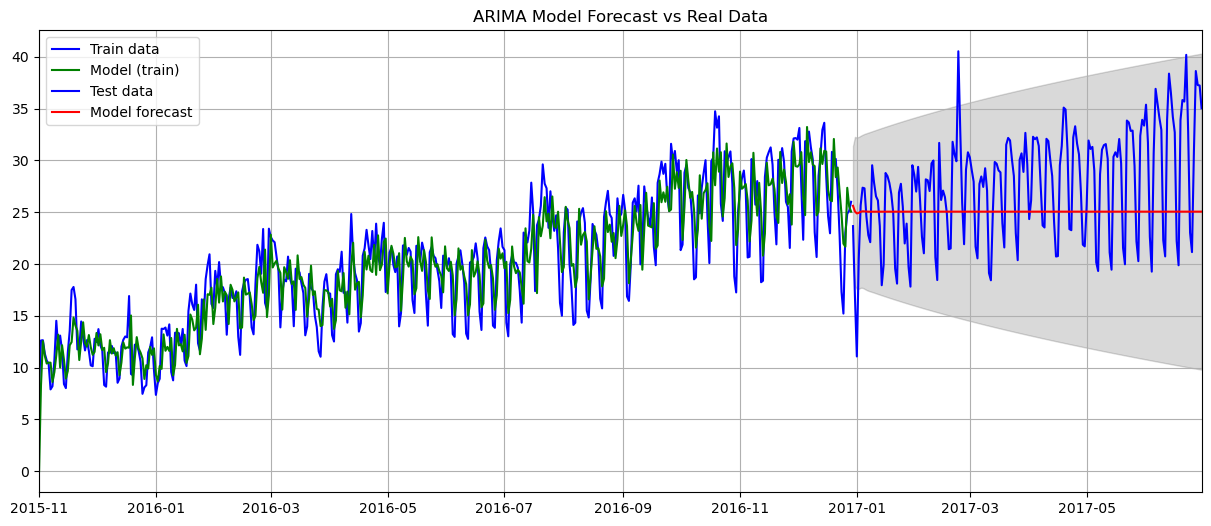

In [943]:
# 1. Visualisation des résultats
plt.figure(figsize=(15, 6))

# Tracer les données d'entraînement (en bleu)
plt.plot(train, c='blue', label='Train data')

# Tracer les prédictions sur l'ensemble d'entraînement (en vert)
plt.plot(model_fit.predict(dynamic=False), c='green', label='Model (train)')

# Tracer les données de test (en bleu)
plt.plot(test, c='blue', label='Test data')

# Tracer les prévisions du modèle ARIMA pour l'ensemble de test (en rouge)
plt.plot(forecast, c='red', label='Model forecast')

# Ajouter les intervalles de confiance autour des prévisions (bande noire)
plt.fill_between(confidence.index, confidence['lower Vehicles'], confidence['upper Vehicles'], color='k', alpha=0.15)

# Ajouter la légende, les axes et le titre
plt.legend()
plt.grid(True)
plt.margins(x=0)
plt.title("ARIMA Model Forecast vs Real Data")

# Afficher le graphique
plt.show()


### LSTM

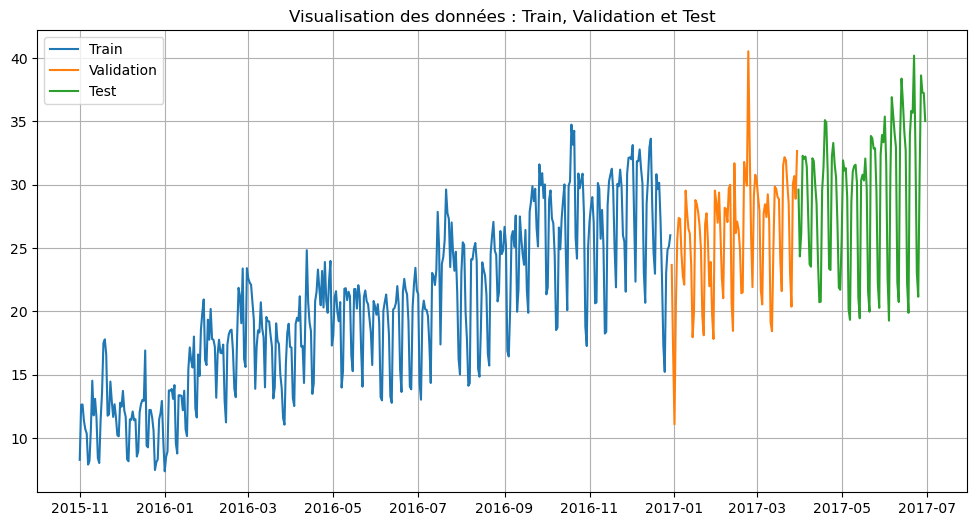

In [944]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # 1. Chargement des données et agrégation par jour
# data = pd.read_csv("data_pretraitées.csv", parse_dates=['DateTime'], index_col='DateTime')
# data_daily = data['Vehicles'].resample('D').mean().dropna()

# 2. Fonction de préparation des séquences
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence) - 1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

# 3. Fonctions de normalisation
def MinMaxScale(t, t_or):
    return (t - t_or.min()) / (t_or.max() - t_or.min())

def InverseMinMaxScale(t, t_or):
    return t * (t_or.max() - t_or.min()) + t_or.min()

# 4. Préparation des séquences avec 'sampling'
n_steps = 10  # Nombre d'étapes pour prédire
X, Y = sampling(data_daily.values, n_steps)

# 5. Division des données en Train, Validation et Test
size = int(len(data_daily) * 0.7)
size2 = int(((len(data_daily) - size) / 2) + size)

X_train, Y_train = X[:size], Y[:size]
X_val, Y_val = X[size:size2], Y[size:size2]
X_test, Y_test = X[size2:], Y[size2:]

# 6. Redimensionnement des données pour LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 7. Visualisation des ensembles de données
plt.figure(figsize=(12, 6))
plt.plot(data_daily[:size], label='Train')
plt.plot(data_daily[size:size2], label='Validation')
plt.plot(data_daily[size2:], label='Test')
plt.title("Visualisation des données : Train, Validation et Test")
plt.legend()
plt.grid()
plt.show()


Forme de X_train : (425, 10, 1)
Forme de Y_train : (425,)
Forme de X_val   : (91, 10, 1)
Forme de Y_val   : (91,)


c:\Users\sayli\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_64 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

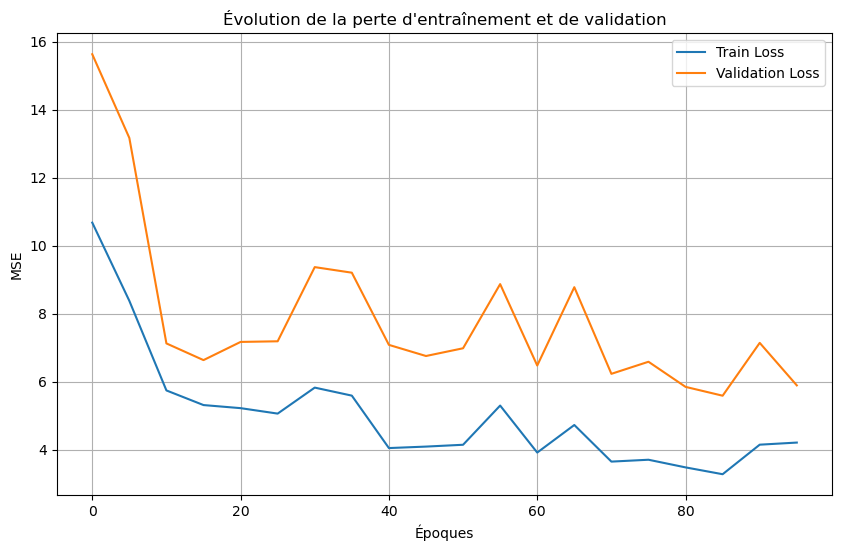

Train MSE minimum: 3.27448
Validation MSE minimum: 5.58400


In [945]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# 1. Définir les paramètres
n_features = 1  # Nombre de caractéristiques (1 seule ici car nous avons une série temporelle)
n_steps = 10    # Nombre d'étapes utilisées pour prédire

# Les données X_train, Y_train, X_val, Y_val sont déjà préparées à l'étape précédente
print(f"Forme de X_train : {X_train.shape}")
print(f"Forme de Y_train : {Y_train.shape}")
print(f"Forme de X_val   : {X_val.shape}")
print(f"Forme de Y_val   : {Y_val.shape}")

# 2. Création du modèle LSTM
model = Sequential()

# Ajout de la couche LSTM avec 50 neurones et activation 'relu'
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))

# Ajout d'une couche Dense de sortie avec 1 neurone
model.add(Dense(1))

# 3. Compilation du modèle
model.compile(optimizer='adam', loss='mse')

# 4. Résumé du modèle
model.summary()

# 5. Initialisation des listes pour stocker les erreurs
mse_train = []  # Liste pour stocker les erreurs d'entraînement
mse_val = []    # Liste pour stocker les erreurs de validation

# 6. Boucle d'entraînement sur différentes époques
for epoch in range(0, 100, 5):  # Entraîner le modèle toutes les 5 époques jusqu'à 100 époques
    # Entraîner le modèle
    model.fit(X_train, Y_train, epochs=5, verbose=0, validation_data=(X_val, Y_val))
    
    # Prédictions sur les ensembles d'entraînement et de validation
    Train_pred = model.predict(X_train, verbose=0)
    Val_pred = model.predict(X_val, verbose=0)
    
    # Calcul des erreurs quadratiques moyennes (MSE)
    mse_t = mean_squared_error(Y_train, Train_pred)
    mse_v = mean_squared_error(Y_val, Val_pred)
    
    # Stocker les erreurs
    mse_train.append(mse_t)
    mse_val.append(mse_v)

# 7. Visualisation de la perte d'entraînement et de validation
plt.figure(figsize=(10, 6))
plt.plot(range(0, 100, 5), mse_train, label='Train Loss')
plt.plot(range(0, 100, 5), mse_val, label='Validation Loss')
plt.title("Évolution de la perte d'entraînement et de validation")
plt.xlabel("Époques")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.show()

# 8. Affichage des MSE minimum
print(f"Train MSE minimum: {min(mse_train):.5f}")
print(f"Validation MSE minimum: {min(mse_val):.5f}")


Epoch 1/200


c:\Users\sayli\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1822
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1385
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0957
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0607
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134
Epoch 15/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128
Epoch 16/200
14

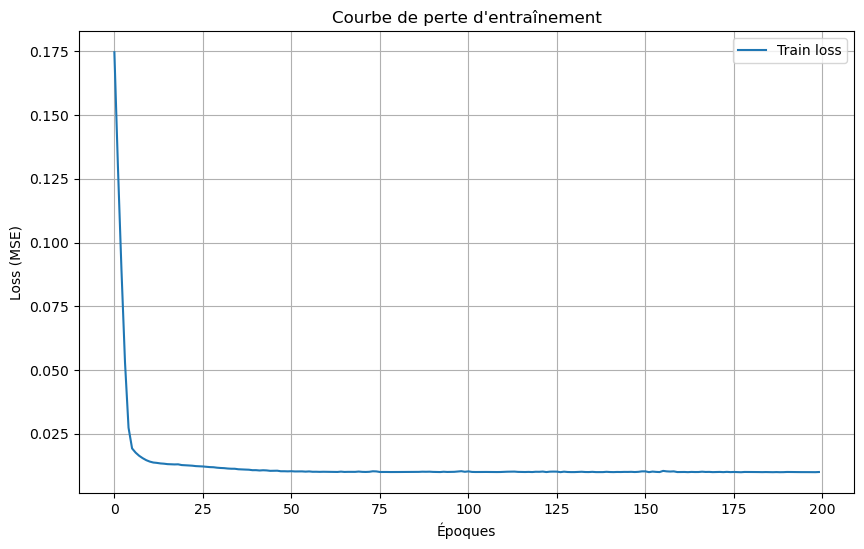

Train MSE minimum: 0.009900658391416073


In [952]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# # 1. Chargement des données
# data = pd.read_csv("data_pretraitées.csv", parse_dates=['DateTime'], index_col='DateTime')
# data_daily = data['Vehicles'].resample('D').mean().dropna()

# 2. Fonction de préparation des séquences
def sampling(sequence, n_steps):
    X, Y = list(), list()
    for i in range(len(sequence)):
        sam = i + n_steps
        if sam > len(sequence) - 1:
            break
        x, y = sequence[i:sam], sequence[sam]
        X.append(x)
        Y.append(y)
    return np.array(X), np.array(Y)

# 3. Normalisation des données
def MinMaxScale(t, t_or):
    return (t - t_or.min()) / (t_or.max() - t_or.min())

def InverseMinMaxScale(t, t_or):
    return t * (t_or.max() - t_or.min()) + t_or.min()

# 4. Préparation des séquences
n_steps = 2  # Nombre de pas temporels
X, Y = sampling(data_daily.values, n_steps)

# 5. Reshaping des données pour LSTM (n_samples, n_steps, n_features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # n_features = 1

# 6. Division des données en ensembles d'entraînement et de test
size = int(len(data_daily) * 0.7)
X_train_or, Y_train_or = X[:size], Y[:size]
X_test_or, Y_test_or = X[size:], Y[size:]

# Normalisation des ensembles
X_train = MinMaxScale(X_train_or, data_daily)
Y_train = MinMaxScale(Y_train_or, data_daily)
X_test = MinMaxScale(X_test_or, data_daily)
Y_test = MinMaxScale(Y_test_or, data_daily)

# 7. Création du modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))  # Couche LSTM
model.add(Dense(1))  # Couche de sortie
model.compile(optimizer='adam', loss='mse')  # Compilation du modèle

# 8. Entraînement du modèle
model_fit = model.fit(X_train, Y_train, epochs=200, verbose=1)

# 9. Prédictions sur les ensembles d'entraînement et de test
Train_pred = model.predict(X_train, verbose=0)
Y_pred = model.predict(X_test, verbose=0)

# 10. Calcul des erreurs quadratiques moyennes (MSE)
print('MSE Train:', mean_squared_error(Train_pred, Y_train))  # MSE sur l'entraînement
print('MSE Test:', mean_squared_error(Y_pred, Y_test))  # MSE sur le test

# 11. Tracer la courbe de perte d'entraînement
plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['loss'], label='Train loss')
plt.title("Courbe de perte d'entraînement")
plt.xlabel("Époques")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid()
plt.show()

# 12. Afficher la valeur minimale de la perte d'entraînement
print('Train MSE minimum:', min(model_fit.history['loss']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

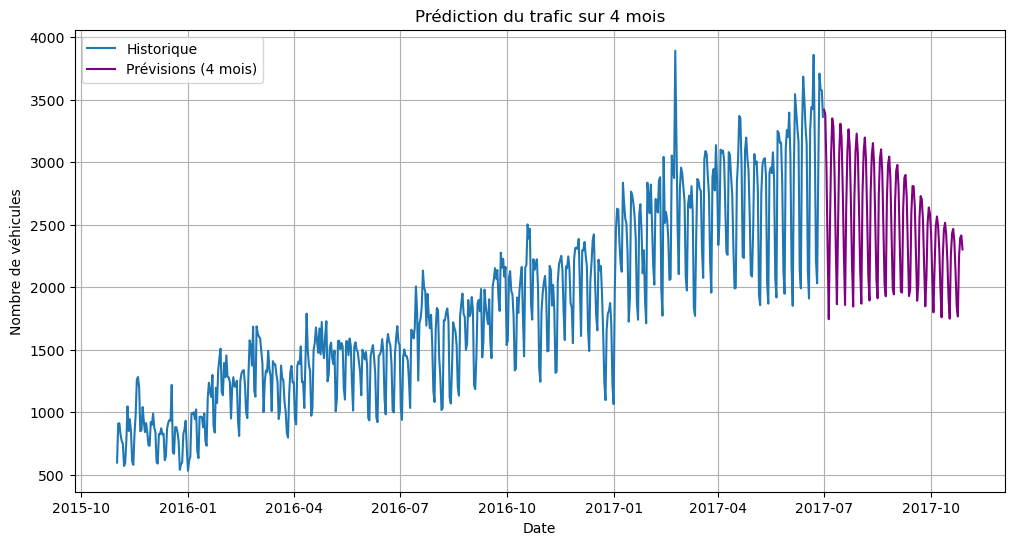

In [957]:
# Génération des prévisions sur 4 mois (120 jours)
future_steps = 120
future_input = train_scaled[-seq_length:]  # Dernières séquences pour prédire l'avenir

predictions = []
for _ in range(future_steps):
    pred = model.predict(future_input.reshape(1, seq_length, 1))
    predictions.append(pred[0, 0])
    future_input = np.append(future_input[1:], pred).reshape(seq_length, 1)

# Rescaling des prédictions
predictions_rescaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Affichage des prévisions
future_dates = pd.date_range(start=test.index[-1], periods=future_steps + 1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(daily_data, label="Historique")
plt.plot(future_dates, predictions_rescaled, label="Prévisions (4 mois)", color='purple')
plt.title("Prédiction du trafic sur 4 mois")
plt.xlabel("Date")
plt.ylabel("Nombre de véhicules")
plt.legend()
plt.grid()
plt.show()

### Phase 5 :  Interprétation des Résultats et Recommandations

#### Précision et Fiabilité des Prédictions 

3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step
Évaluation des performances du modèle sur les données de test :
Mean Absolute Error (MAE) : 197.02
Root Mean Squared Error (RMSE) : 245.69
Mean Absolute Percentage Error (MAPE) : 7.09%
R² Score : 0.817


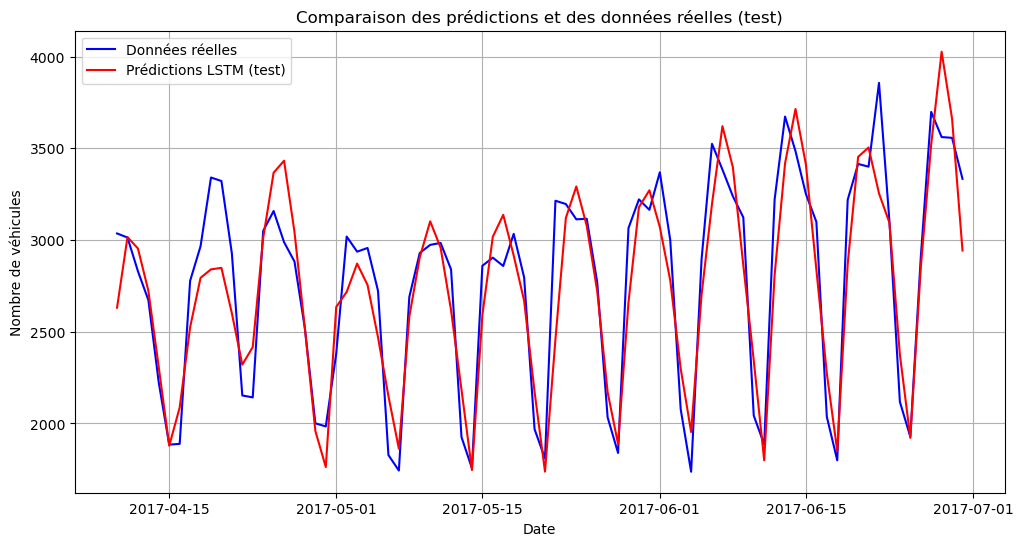

In [959]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Comparaison des prédictions (sur les données historiques)
Y_test_or = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Restaurer les valeurs réelles
Y_pred_test_rescaled = scaler.inverse_transform(model.predict(X_test))  # Restaurer les prédictions

# Calcul des métriques
mse = mean_squared_error(Y_test_or, Y_pred_test_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_or, Y_pred_test_rescaled)
mape = np.mean(np.abs(Y_pred_test_rescaled - Y_test_or) / np.abs(Y_test_or)) * 100
r2 = r2_score(Y_test_or, Y_pred_test_rescaled)

print("Évaluation des performances du modèle sur les données de test :")
print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE) : {mape:.2f}%")
print(f"R² Score : {r2:.3f}")

# Visualisation des prédictions vs. valeurs historiques
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index[-len(Y_test):], Y_test_or, label='Données réelles', color='blue')
plt.plot(daily_data.index[-len(Y_pred_test_rescaled):], Y_pred_test_rescaled, label='Prédictions LSTM (test)', color='red')
plt.title('Comparaison des prédictions et des données réelles (test)')
plt.xlabel('Date')
plt.ylabel('Nombre de véhicules')
plt.legend()
plt.grid()
plt.show()


#### Identification des Périodes Critiques 


Top 10 jours avec le trafic le plus élevé prévu (4 mois) :
2017-08-12 00:00:00: 3152.85 véhicules
2017-08-05 00:00:00: 3197.19 véhicules
2017-07-16 00:00:00: 3197.85 véhicules
2017-07-29 00:00:00: 3229.02 véhicules
2017-07-22 00:00:00: 3263.01 véhicules
2017-07-09 00:00:00: 3283.90 véhicules
2017-07-15 00:00:00: 3308.07 véhicules
2017-07-08 00:00:00: 3350.48 véhicules
2017-07-02 00:00:00: 3379.88 véhicules
2017-07-01 00:00:00: 3419.67 véhicules


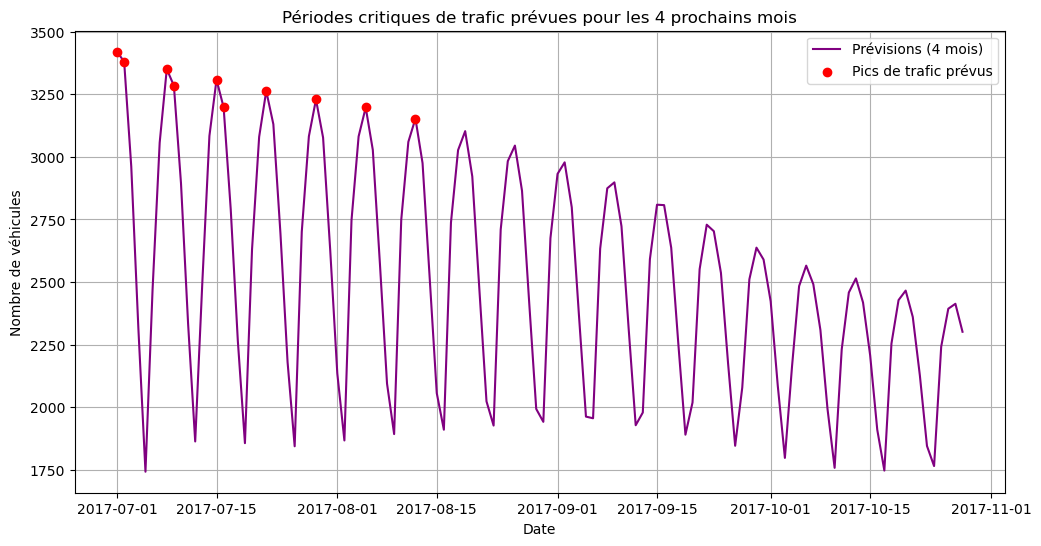

In [960]:
# Identification des pics de trafic dans les prévisions
future_peak_indices = np.argsort(predictions_rescaled.flatten())[-10:]  # Indices des 10 pics les plus élevés
future_peak_dates = future_dates[future_peak_indices]  # Dates correspondantes
future_peak_values = predictions_rescaled.flatten()[future_peak_indices]  # Valeurs correspondantes

# Affichage des 10 jours de trafic le plus élevé dans les prévisions
print("\nTop 10 jours avec le trafic le plus élevé prévu (4 mois) :")
for date, value in zip(future_peak_dates, future_peak_values):
    print(f"{date}: {value:.2f} véhicules")

# Visualisation des pics futurs
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predictions_rescaled, label='Prévisions (4 mois)', color='purple')
plt.scatter(future_peak_dates, future_peak_values, color='red', label='Pics de trafic prévus', zorder=5)
plt.title('Périodes critiques de trafic prévues pour les 4 prochains mois')
plt.xlabel('Date')
plt.ylabel('Nombre de véhicules')
plt.legend()
plt.grid()
plt.show()
